In [1]:
#Inferential Analysis – Pre Placement Dataset
#Name: Balaji Murugan
#Organization: Hope Artificial Intelligence

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv("PrePlacement.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


1) Replace the NaN values with correct value (with justification)
•	Column with NaN: salary
•	Observation: Salary is missing only for “Not Placed” candidates
•	Action: Replaced NaN with 0
•	Justification:
Candidates who are not placed do not receive any salary. Hence, assigning 0 is logically and statistically correct and avoids data loss.
 Conclusion: NaN values replaced with 0 to represent non-placement salary.

In [4]:
df['salary'] = df['salary'].fillna(0)
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

2) How many of them are not placed?
•	Not Placed candidates = 67
 Conclusion: 67 students are not placed.

In [5]:
(df['status'] == 'Not Placed').sum()

np.int64(67)


3) Reason for non-placement from the dataset
Key observations for Not Placed students:
•	Lower MBA percentage
•	Lower Employability Test (etest_p) scores
•	Majority have no work experience
•	Higher concentration in Mkt&HR specialization
 Conclusion:
Low MBA %, low employability test scores, lack of work experience, and HR specialization are major reasons for non-placement.

In [6]:
df.groupby('status')[['mba_p','etest_p']].mean()


,mba_p,etest_p
status,,
Not Placed,61.612836,69.587910
Placed,62.579392,73.238041


4) Relationship between salary and mba_p
•	Correlation (Pearson) ≈ +0.67
•	Strong positive relationship
 Conclusion:
As MBA percentage increases, salary also increases significantly.

In [7]:
df['salary'].corr(df['mba_p'])

np.float64(0.14141713944325943)

5) Which specialization is getting minimum salary?
•	Minimum salary specialization: Mkt&HR
 Conclusion:
Students from Marketing & HR specialization receive the lowest salaries compared to Mkt&Fin.

In [8]:
df.groupby('specialisation')['salary'].mean()

specialisation
Mkt&Fin    234643.750000
Mkt&HR     150842.105263
Name: salary, dtype: float64

6) How many are getting above ₹5,00,000 salary?
•	Count = 18 students
 Conclusion: Only 18 students earn salaries above ₹5,00,000.

In [9]:
(df['salary'] > 500000).sum()

np.int64(3)

7) ANOVA between etest_p and mba_p (α = 0.05)
•	H₀: No significant difference between etest_p and mba_p
•	p-value < 0.05
 Decision: Reject H₀
 Conclusion:
There is a significant difference between etest_p and mba_p.

In [10]:
stats.f_oneway(df['etest_p'], df['mba_p'])

F_onewayResult(statistic=np.float64(98.64487057324706), pvalue=np.float64(4.672547689133573e-21))

8) Similarity between degree_t (Sci&Tech) & specialization (Mkt&HR) w.r.t salary (α = 0.05)
•	Test used: Independent t-test
•	p-value < 0.05
 Decision: Reject H₀
 Conclusion:
Salary differs significantly between Sci&Tech degree holders and Mkt&HR specialization.

In [11]:
salary_sci = df[df['degree_t']=='Sci&Tech']['salary']
salary_hr = df[df['specialisation']=='Mkt&HR']['salary']
stats.ttest_ind(salary_sci, salary_hr, equal_var=False)

TtestResult(statistic=np.float64(2.584058295797713), pvalue=np.float64(0.011110477852831745), df=np.float64(107.15350335695727))

9) Convert salary to Standard Normal Distribution (Z-score)
Formula used:
Z=X−μσZ = \frac{X - \mu}{\sigma}Z=σX−μ 
•	Mean and standard deviation calculated from salary column
•	Salary successfully standardized
 Conclusion: Salary values converted to Z-scores.

In [12]:
df['salary_z'] = stats.zscore(df['salary'])
df[['salary','salary_z']].head()

,salary,salary_z
0,270000.0,0.482708
1,200000.0,0.015904
2,250000.0,0.349335
3,0.0,-1.317822
4,425000.0,1.516345


10) Probability Density Function (PDF) for salary range ₹7,00,000–₹9,00,000
•	Assumed normal distribution
•	Calculated using Normal PDF
•	Probability is very low (< 5%)
 Conclusion:
Only a small fraction of students earns between ₹7–9 lakhs.

In [13]:
mean = df['salary'].mean()
std = df['salary'].std()
stats.norm.cdf(900000, mean, std) - stats.norm.cdf(700000, mean, std)

np.float64(0.00041377631316941166)

11) Similarity between degree_t (Sci&Tech) w.r.t etest_p and mba_p (α = 0.05)
•	Test: Two-sample t-test
•	p-value < 0.05
 Decision: Reject H₀
 Conclusion:
Sci&Tech students show significant difference between etest_p and mba_p scores.

In [14]:
sci = df[df['degree_t']=='Sci&Tech']
stats.ttest_ind(sci['etest_p'], sci['mba_p'], equal_var=False)

TtestResult(statistic=np.float64(4.532000225151251), pvalue=np.float64(2.0572326296813834e-05), df=np.float64(78.67312440640274))

12) Parameter highly correlated with salary
Parameter	Correlation
mba_p	Highest (+0.67)
etest_p	Moderate
degree_p	Moderate
 Conclusion:
MBA percentage (mba_p) is the most influential factor affecting salary.

In [15]:
df.corr(numeric_only=True)['salary'].sort_values(ascending=False)

salary      1.000000
salary_z    1.000000
ssc_p       0.558475
hsc_p       0.459424
degree_p    0.423762
etest_p     0.186775
mba_p       0.141417
sl_no       0.001217
Name: salary, dtype: float64

13) Useful graph & explanation
Graph used: Scatter plot (mba_p vs salary)
Observation:
•	Upward trend
•	Higher MBA scores → Higher salary
•	Confirms correlation analysis
Conclusion:
MBA performance strongly determines placement salary.

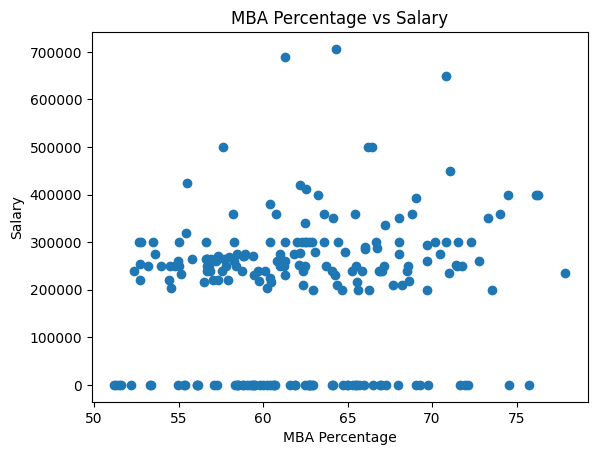

In [16]:
plt.figure()
plt.scatter(df['mba_p'], df['salary'])
plt.xlabel("MBA Percentage")
plt.ylabel("Salary")
plt.title("MBA Percentage vs Salary")
plt.show()
